# DTSA-5509 Final Project by Joseph Bae
* For my project I will be exploring the Adult database from UCI$^{1}$, which contains a variety of data about working-age adults in the US
along with an indication of whether they make above or below 50K USD per year.
* My objective will be to input this data into a machine learning model that predicts the income level (below or above 50K USD annual) with at least as much accuracy as the benchmarks listed on UCI (about 80 to 88%).
* To do so, I will be training several different models as learned in class and comparing their performance, and ultimately selecting the best one.

# Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [76]:
%%html
<style>
table {float:left}
</style>

# Description of the data
* The adult.data file is taken from the UCI ML Repository$^{1}$, and contains a sample of 32,561 observations from the 1994 Census database revolving around demographics, work, and income.
* The data file size is small at only 3.8 MB
* Each observation records 14 characteristics, and also a classification on whether the individual makes above or below 50K USD annual salary.
* Each column is described below, but more formal info about the dataset can be found here: https://archive.ics.uci.edu/dataset/2/adult
# Columns/Features
| Variable | Data Type | Variable Type | Description |
|:--------|:--------|:--------|:--------|
| age | integer | nominal | The age in years of this person. |
| workclass | string | categorical | Occupation type as far as being self-employed, government worker, unemployed, etc. |
| fnlwgt | integer | continuous | "final weight", a set of weights given to each observation that represent how many people each observation represents. |
| education | string | categorical | The highest level of schooling completed. |
| education-num | integer | ordinal | A numerical representation of the educational column. |
| marital-status | string | categorical | Different categorizations ranging from single, to married/divorced, or widowed. |
| occupation | string | categorical | The industry that this person works in. |
| relationship | string | categorical | The relationship of this person in their family (wife, husband, unmarried, not-in-family, etc.) |
| race | string | categorical | The ethnicity of this person. | 
| sex | string | categorical | The gender of this person. |
| capital-gain | integer | continuous | Total capital gain for this person. |
| capital-loss | integer | continuous | Total capital loss for this person. |
| hours-per-week | integer | discrete | The number of hours this person works in a week. |
| native-country | string | categorical | The birth country for this person before coming to the US. |
| income | string | categorical | Indication of whether this person makes below or above $50K. |

# Data Import and Preprocessing

First, we read in the CSV and give each column a header/title matching to the variable recorded in it. <br>
Then, let's strip any whitespaces out of the string columns to make it easier to read later in EDA. <br>

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/jDyn90/dtsa5509/main/adult.data', names=[
    'age', 
    'workclass', 
    'fnlwgt', 
    'education', 
    'education-num', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race', 
    'sex', 
    'capital-gain', 
    'capital-loss', 
    'hours-per-week', 
    'native-country',
    'income'])

In [78]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [79]:
string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for s in string_columns:
    df[s] = df[s].str.strip()

# Exploratory Data Analysis (EDA)

Let's first get a general idea about each column by getting the data type and count of each.

In [80]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [81]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

We can see that there are 32,561 observations as expected, and the data type for each column aligns with our descriptions of the columns above.<br>
To gain a further understanding of the data, let's analyze each column individually.

## Analysis of numerical variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

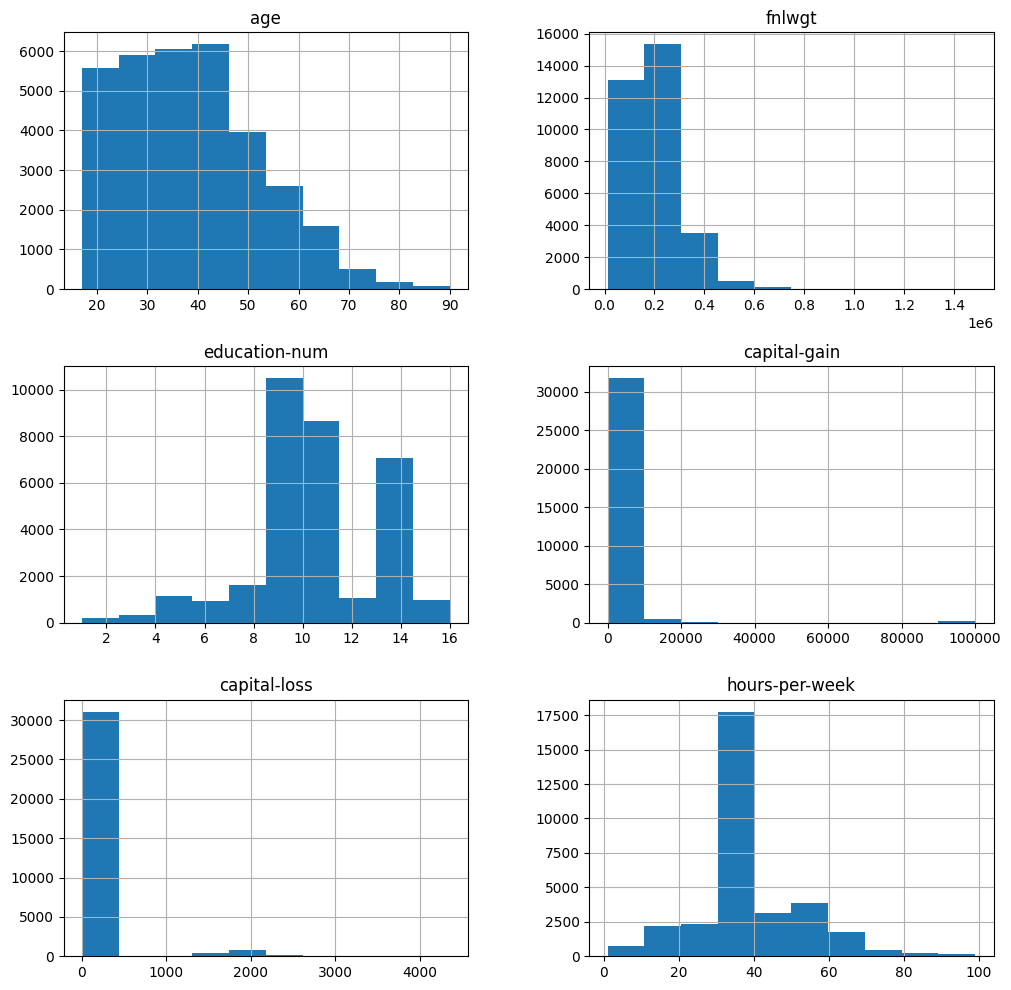

In [82]:
fig, axis = plt.subplots(3, 2, figsize = (12, 12))
df.hist(ax = axis)

### Analysis of Age
* Our dataset looks heavily skewed towards those younger than 50, which makes sense as they make up the vast majority of the working population.
* Overall I think it looks representative of the actual US workforce, and is a valid dataset for training our model.

### Analysis of fnlwgt
* The documentation refers to this as the "final weight" and that it is supposed to estimate how much population each line item represents.
* However, I'm not sure this is true since the total of this column far exceeds the US population. That, or I don't understand this column properly.
* Due to lack of documentation and understanding of this datapoint, I'm choosing to exclude it from the model and dropping it from the dataset.

### Analysis of education-num
* At first I thought this would represent years of education, but from the histogram and doing some counts I see that a higher number generally represents higher education, but the grouping is not obvious.
* This column is a 1-to-1 match with the 'education' column, in that 9 = "HS-grad", 10 = "Some-college", 13 = "Bachelors" and so on.
* I favor dropping the education-num column and using the 'education' column instead to represent education as it's less ambiguous on what every value means.

<Axes: title={'center': 'Bar plot of Education-num'}, xlabel='education-num'>

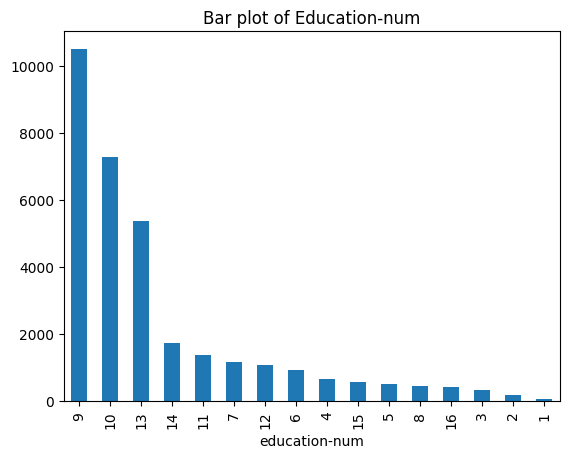

In [83]:
df['education-num'].value_counts().plot(kind = 'bar', title = 'Bar plot of Education-num')

<Axes: title={'center': 'Bar plot of Education'}, xlabel='education'>

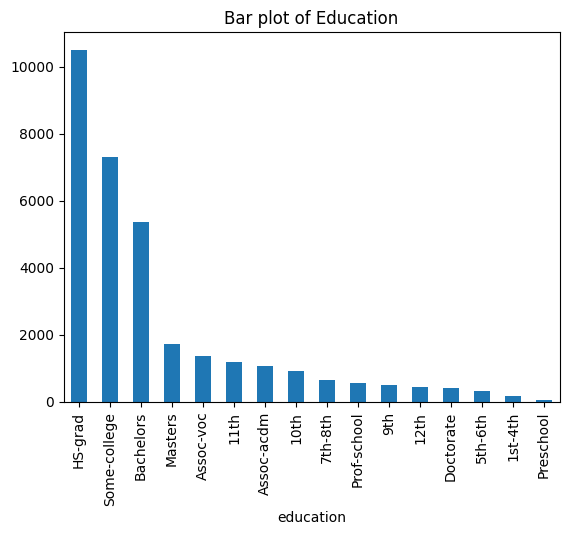

In [84]:
df['education'].value_counts().plot(kind = 'bar', title = 'Bar plot of Education')

### Analysis of capital-gain and capital-loss
* These columns are mostly composed of zero values. Due to that, I will be excluding these 2 columns from my model.

In [85]:
df['capital-gain'].value_counts()

capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [86]:
df['capital-loss'].value_counts()

capital-loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

### Analysis of hours-per-week
* This looks heavily skewed towards 40 hours per week, which is expected as that comprises most of the contracted working hours of people in the US.

# Analysis of categorical variables

### Analysis of workclass
* The vast majority of observations have occupations in the Private sector, and that aligns with expectations, as per Bureau of Labor Statistics - roughly 85% of US employees work in the private sector as of 2020.
* There is a small portion, about 6%, of records with '?' in this column which presumably means the data is missing. Since it's a small portion, I'm comfortable with removing these observations from the dataset rather than trying to infer what they are.
* There are almost no records under 'Without-pay' or 'Never-worked' workclasses. This is fine since the model has the most meaning when predicting income level for working adults in the US, but it brings up an interesting thought of how big the proportion is of adults in the US who have never worked yet would make >$50K USD annual income from something like investments or endowments.

In [87]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: title={'center': 'Bar chart of workclass'}, xlabel='workclass'>

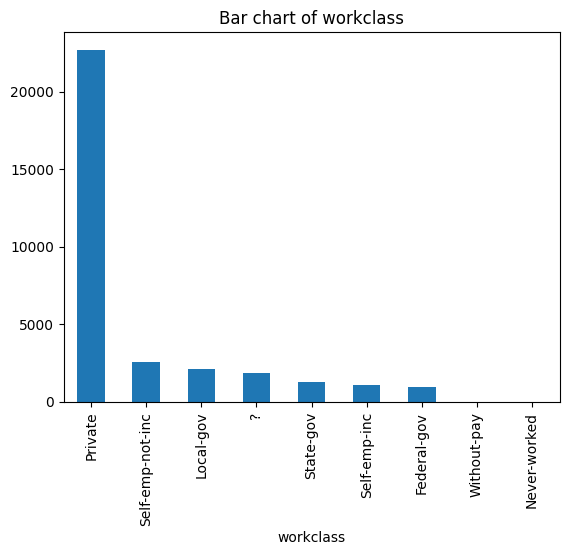

In [88]:
df['workclass'].value_counts().plot(kind = 'bar', title = 'Bar chart of workclass')

### Analysis of education
* I analyzed this column in the above section while we were analyzing education-num
* This column is a 1-to-1 match with the education-num column, but is a more clear descriptor and so education-num column was dropped in favor of using this one for modeling.

### Analysis of marital-status
* The most frequent values here are married-civ-spouse, never-married, and divorced. These seem to align with the 3 most common statuses for working adults in the US.
* Following that, there are some values like Married-spouse-absent and Married-AF-spouse whose definition is unclear, but luckily they comprise a very small part of the data.

<Axes: title={'center': 'Bar chart of marital status'}, xlabel='marital-status'>

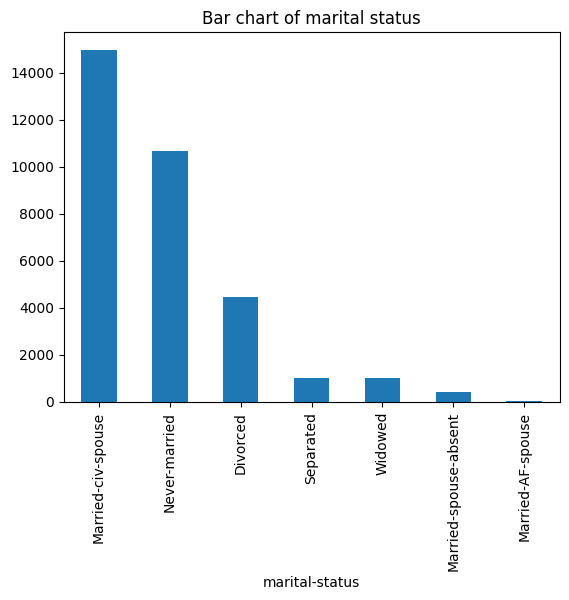

In [89]:
df['marital-status'].value_counts().plot(kind = 'bar', title = 'Bar chart of marital status')

### Analysis of occupation
* There are 14 distinct occupations with records, but only 6 of them comprise over half the dataset.
* The other 8 are major industries as well, and I feel that some of these are underrepresented in our sample data.
* Ideally I would want to collect more samples for the 8 under-represented industries until each industry is equally represented in our data.
* There's about 1800 '?' values that will need to be dropped from the dataset, as they're missing and can't easily be guessed using other data points.

<Axes: title={'center': 'Bar chart of occupation'}, xlabel='occupation'>

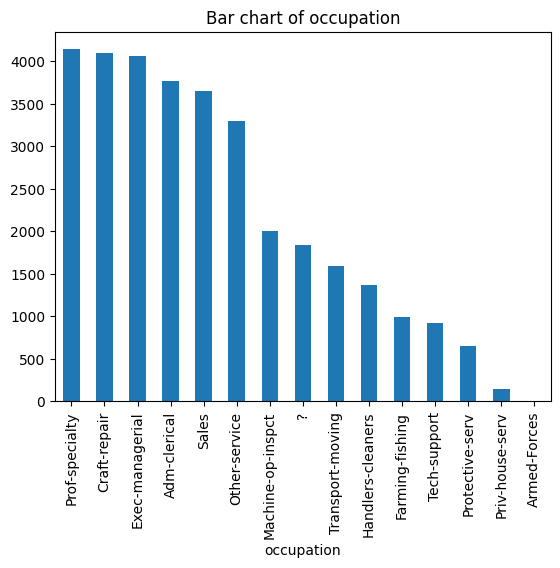

In [90]:
df['occupation'].value_counts().plot(kind = 'bar', title = 'Bar chart of occupation')

### Analysis of relationship
* Husband is the category here with the most records. Conversely, wife has one of the least amount of records.
* This indicates that Wife is underrepresented in our sample, because in the real world wives should be close to the number of husbands.
* The categories "not in family", "own-child", and "other-relative" are unclear from name as to how they're defined. It's not obvious what's the difference between not-in-family and unmarried. Also, I'm not sure what own-child could mean.
* Given the unbalanced nature of this category and the vague definitions, it'd be good to find out more about these values before interpreting model results concerning these categories too heavily.
* This chart also implies that women are underrepresented in our data, given by the very low frequency of category 'Wife'.

<Axes: title={'center': 'Bar chart of relationship'}, xlabel='relationship'>

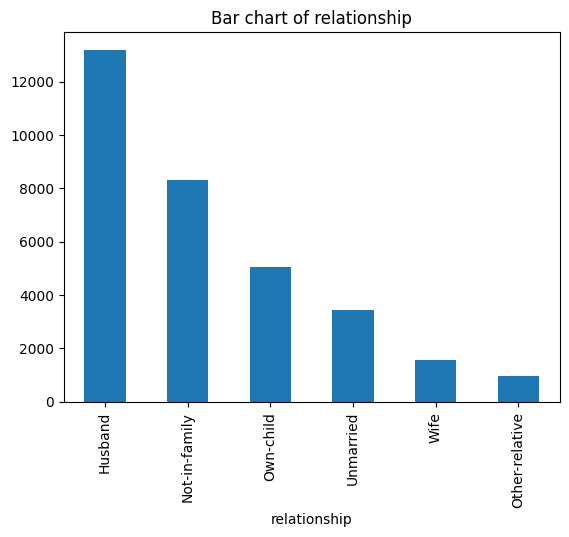

In [91]:
df['relationship'].value_counts().plot(kind = 'bar', title = 'Bar chart of relationship')

### Analysis of sex
* Here we confirm that females are underrepresented in the data, as they comprise only half the number of records for males.
* We should provide disclaimer that our model results will be less accurate for women than they are for men, given their significantly less number of observations.

<Axes: title={'center': 'Bar chart of sex'}, xlabel='sex'>

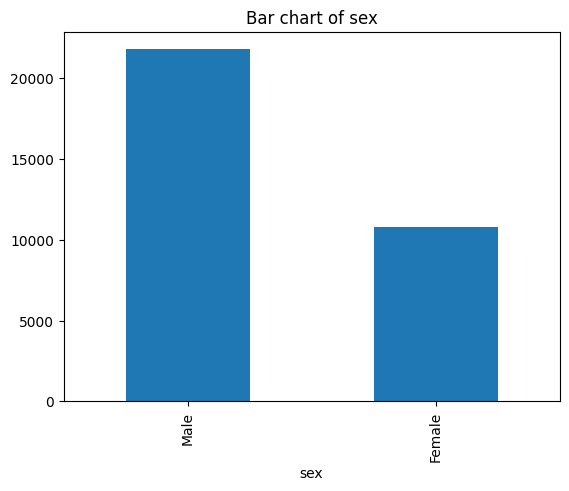

In [92]:
df['sex'].value_counts().plot(kind = 'bar', title = 'Bar chart of sex')

### Analysis of race
* Here we see another underrepresentation in our dataset. The vast majority of our observations are on white people, and comparitively few are for any other race.
* There are no observations for Hispanic people, unless it is included in 'Other'.
* We should acknowledge that model predictions will be better trained on, and will be more accurate for white working adults more than other ethnicities.

<Axes: title={'center': 'Bar chart of race'}, xlabel='race'>

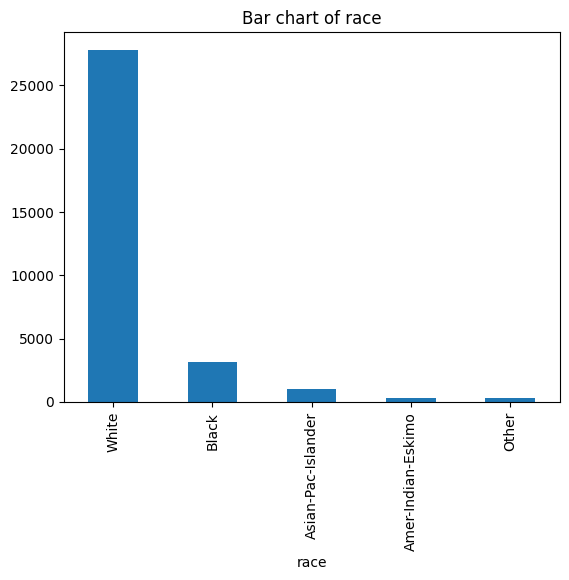

In [93]:
df['race'].value_counts().plot(kind = 'bar', title = 'Bar chart of race')

### Analysis of native-country
* Here we see most all records are of native-country US.
* There are such few records for any other country that it doesn't appear useful for the model, in that it doesn't provide any information not already provided by other columns.
* For this modeling exercise, the native-country column will be removed from the dataset.

<Axes: title={'center': 'Bar chart of native-country'}, xlabel='native-country'>

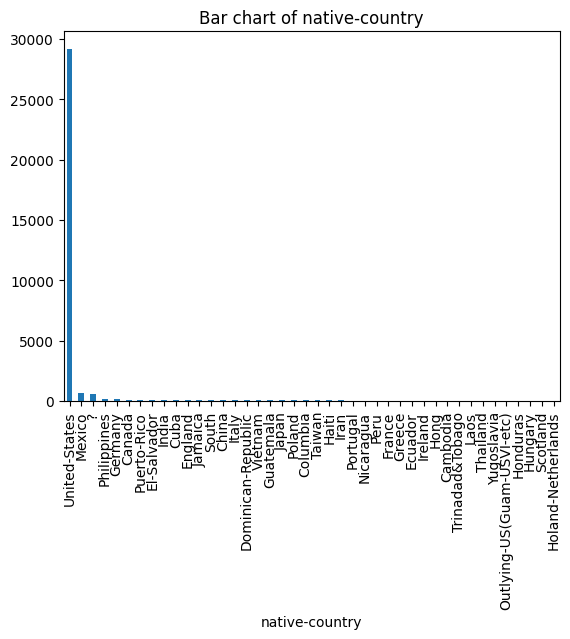

In [94]:
df['native-country'].value_counts().plot(kind = 'bar', title = 'Bar chart of native-country')

# Prep the data for modeling

### Drop the fnlwgty, education-num, capital-gain, capital-loss, and native-country columns as decided in above analyses

In [95]:
df = df.drop(['native-country', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'], axis = 1)

### Drop rows with missing values in workclass and/or occupation

In [96]:
# count how many missing values indicated by "?" are in each column
for s in df.columns:
    print("column " + s + " has " + (df[s] == '?').sum().astype(str) + " missing values")

column age has 0 missing values
column workclass has 1836 missing values
column education has 0 missing values
column marital-status has 0 missing values
column occupation has 1843 missing values
column relationship has 0 missing values
column race has 0 missing values
column sex has 0 missing values
column hours-per-week has 0 missing values
column income has 0 missing values


In [97]:
df = df.drop(df[df['workclass'] == '?'].index, axis = 0)
df = df.drop(df[df['occupation'] == '?'].index, axis = 0)
df.count()

age               30718
workclass         30718
education         30718
marital-status    30718
occupation        30718
relationship      30718
race              30718
sex               30718
hours-per-week    30718
income            30718
dtype: int64

### Normalize the numerical features to help with algorithm optimization when training our models

In [98]:
df['age'] = df['age'] / df['age'].sum()
df['hours-per-week'] = df['hours-per-week'] / df['hours-per-week'].sum()

### Convert categorical variables into multiple numerical columns (aka One-Hot Encoding)

In [99]:
# this function splits a dataframe column with n values
# into n binary columns, which are then added into
# the dataframe, replacing the original column.
def split_replace(df, col):
    dict = {}
    split = pd.get_dummies(df[col])
    i = 0
    
    for l in split:
        dict[l] = col + '_' + l
        i += 1

    df = df.drop(col, axis=1)
    df = df.join(split.rename(columns=dict).astype(int))
    
    return df

In [100]:
# calling the split_replace function for all of these features
# will break out the columns into n separate binary features, where
# n is the unique number of data values contained in the column
string_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

for s in string_columns:
    df = split_replace(df, s)

In [101]:
# the dataset is now composed of 30,718 samples with 59 features
df

,age,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.000033,0.000032,<=50K,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0.000042,0.000010,<=50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.000032,0.000032,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.000045,0.000032,<=50K,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0.000024,0.000032,<=50K,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.000023,0.000030,<=50K,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,0.000034,0.000032,>50K,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,0.000049,0.000032,<=50K,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,0.000019,0.000016,<=50K,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### Encode the target variable as [1, -1]
Let's encode income, which is our target variable, as [1, -1], so we can use it in classification algorithms

In [102]:
df['income'] = df['income'].replace({' >50K': '1', ' <=50K': '-1'}).astype(int)

### Inspecting data balance
* We can see by plotting frequency of the 1 and -1 values in our target variable, that many more records are classified -1
* We can account for this by using F1 score to assess model accuracy, rather than the plain accuracy metric which isn't suited for comparing model performance on unbalanced data

<Axes: title={'center': 'Bar chart of income'}, xlabel='income'>

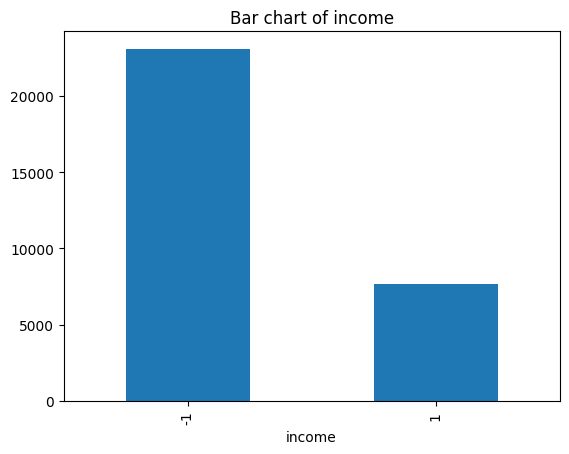

In [103]:
df['income'].value_counts().plot(kind = 'bar', title = 'Bar chart of income')

### Inspecting correlation between features
* In our final dataset, we have 2 numerical columns: age and hours-per-week.
* We can draw a correlation matrix with these features to see at most there is a 0.1 correlation coefficient which is not high enough to warrant any fix.
* I was uncertain how to handle correlation between the categorical features.

<Axes: >

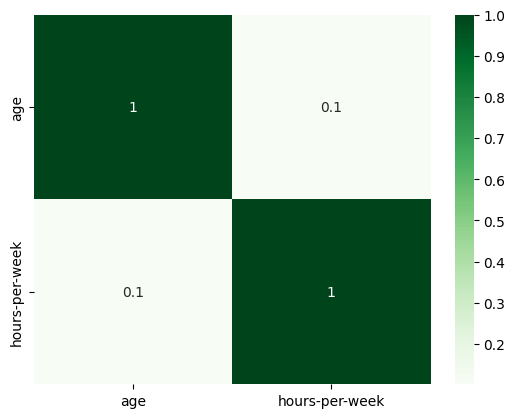

In [106]:
sns.heatmap(df[['age', 'hours-per-week']].corr(), annot = True, cmap='Greens')

# Model Training
* We will select and train 7 classifier models we learned in class (Logistic Regression, KNN, Single DT, Random Forest, Ada Boost, Gradient Boost, and SVM)
* Hyperparameters will be selected via Grid Search
* Models will be compared using the F1-score metric and the best one will be selected as the final model

### Create test and training datasets

In [107]:
X = df[df.columns.drop('income')]
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 812)

### Logistic Regression
* We use class_weight = balanced to account for the class imbalance in the income variable
* The best value for parameter C is 15.56, found via grid search.
* The F1 score on the training data is 0.613.
* The F1 score on the test data is 0.606.
* For reference, the training accuracy is 0.828 and the test accuracy is 0.826.
* We rely more on the F1 score to judge this model as the input data is unbalanced across several dimensions as seen in EDA.
* Training the Logistic Regression model took 62.5ms CPU time.

In [108]:
lr = LogisticRegression()
parameters = {'class_weight':['balanced'], 'C':np.linspace(0.0001, 20, num=10)}
lr_cv = GridSearchCV(lr, param_grid = parameters).fit(X_train, y_train)

In [109]:
print("Hyperparameters: ", lr_cv.best_params_)

Hyperparameters:  {'C': 15.555577777777778, 'class_weight': 'balanced'}


In [110]:
%%time
lr = LogisticRegression(C = 15.555577777777778).fit(X_train, y_train)

CPU times: total: 281 ms
Wall time: 67.1 ms


In [111]:
print("Logistic Regression Training F1 Score: " + str(f1_score(y_train, lr.predict(X_train))))
print("Logistic Regression Test F1 Score: " + str(f1_score(y_test, lr.predict(X_test))))

print("Logistic Regression Training Accuracy: " + str(lr.score(X_train, y_train)))
print("Logistic Regression Test Accuracy: " + str(lr.score(X_test, y_test)))

Logistic Regression Training F1 Score: 0.6131469895181604
Logistic Regression Test F1 Score: 0.6064610866372981
Logistic Regression Training Accuracy: 0.8277870216306157
Logistic Regression Test Accuracy: 0.8255208333333334


### K-Nearest Neighbors
* The best value for n_neighbors is 24, found via grid search.
* The F1 score on the training data is 0.654, and is actually lower than the training F1 score with the default n_neighbors = 5.
* However, the F1 score on the test data is 0.636, which is higher than the test F1 score with default n_neighbors = 5.
* For reference, the training accuracy is 0.840 and the test accuracy is 0.832.
* Training the KNN model took 15.6ms CPU time.

In [112]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(12,28)}
knn_cv = GridSearchCV(knn, param_grid = parameters).fit(X_train, y_train)

In [113]:
print("Hyperparameters: ", knn_cv.best_params_)

Hyperparameters:  {'n_neighbors': 24}


In [114]:
%%time
knn = KNeighborsClassifier(n_neighbors = 24).fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 14 ms


In [115]:
print("KNN Training F1 Score: " + str(f1_score(y_train, knn.predict(X_train))))
print("KNN Test F1 Score: " + str(f1_score(y_test, knn.predict(X_test))))

print("KNN Training Accuracy: " + str(knn.score(X_train, y_train)))
print("KNN Test Accuracy: " + str(knn.score(X_test, y_test)))

KNN Training F1 Score: 0.6535414542317044
KNN Test F1 Score: 0.6361071932299013
KNN Training Accuracy: 0.8402300513636692
KNN Test Accuracy: 0.83203125


### Single Decision Tree
* We use class_weight = balanced to account for the class imbalance in the income variable
* The best value for max_depth is 4, and max_leaf_nodes is 8, found via grid search.
* The F1 score on the training data is 0.609, and on the test data is 0.597.
* This model so far has performed the worst.
* For reference, the training accuracy is 0.743 and the test accuracy is 0.737.
* Training the DT model took 46.9ms CPU time.
* There is opportunity to optimize parameters min_sample_split and min_samples_leaf, however the GridSearchCV took too long and some more knowledge is needed about typical ranges for these parameters.

In [116]:
dt = DecisionTreeClassifier()
parameters = {'class_weight':['balanced'], 'max_depth':np.arange(1,10), 'max_leaf_nodes':np.arange(5,15)}
dt_cv = GridSearchCV(dt, param_grid = parameters).fit(X_train, y_train)

In [117]:
print("Hyperparameters: ", dt_cv.best_params_)

Hyperparameters:  {'class_weight': 'balanced', 'max_depth': 5, 'max_leaf_nodes': 10}


In [118]:
%%time
dt = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 5, max_leaf_nodes = 10).fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 41.9 ms


In [119]:
print("Single DT Training F1 Score: " + str(f1_score(y_train, dt.predict(X_train))))
print("Single DT Test F1 Score: " + str(f1_score(y_test, dt.predict(X_test))))

print("Single DT Training Accuracy: " + str(dt.score(X_train, y_train)))
print("Single DT Test Accuracy: " + str(dt.score(X_test, y_test)))

Single DT Training F1 Score: 0.6093501071251991
Single DT Test F1 Score: 0.5967016491754122
Single DT Training Accuracy: 0.7427837661867901
Single DT Test Accuracy: 0.7373046875


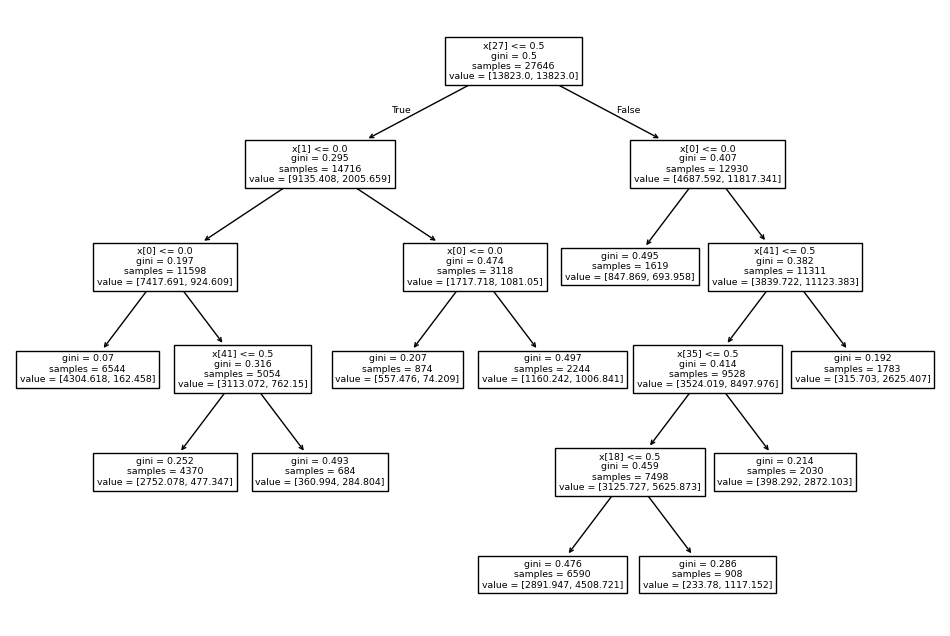

In [120]:
plt.figure(figsize = (12,8))
plot_tree(dt)
plt.show()

### Random Forest
* We use class_weight = balanced to account for the class imbalance in the income variable
* The best value for n_estimators is 21, max_depth is 4, and max_leaf_nodes is 8, found via grid search.
* The F1 score on the training data is 0.607.
* The F1 score on the test data is 0.596.
* For reference, the training accuracy is 0.727 and the test accuracy is 0.723.
* Training the RF model took 62.5ms CPU time.
* This is when using GridSearchCV started to take significant time (few minutes for 32,000 samples data size).

In [121]:
rf = RandomForestClassifier()
parameters = {'class_weight':['balanced'], 'n_estimators': np.arange(1, 100, step = 10), 'max_depth': np.arange(1,10), 'max_leaf_nodes': np.arange(5,15)}
rf_cv = GridSearchCV(rf, param_grid = parameters).fit(X_train, y_train)

In [122]:
print("Hyperparameters: ", rf_cv.best_params_)

Hyperparameters:  {'class_weight': 'balanced', 'max_depth': 9, 'max_leaf_nodes': 14, 'n_estimators': 11}


In [123]:
%%time
rf = RandomForestClassifier(class_weight = 'balanced', n_estimators = 11, max_depth = 9, max_leaf_nodes = 14).fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 73.6 ms


In [124]:
print("Random Forest Training F1 Score: " + str(f1_score(y_train, rf.predict(X_train))))
print("Random Forest Test F1 Score: " + str(f1_score(y_test, rf.predict(X_test))))

print("Random Forest Training Accuracy: " + str(rf.score(X_train, y_train)))
print("Random Forest Test Accuracy: " + str(rf.score(X_test, y_test)))

Random Forest Training F1 Score: 0.6166790925551177
Random Forest Test F1 Score: 0.6102689486552567
Random Forest Training Accuracy: 0.7396368371554656
Random Forest Test Accuracy: 0.7405598958333334


### Ada Boost 
* The best value for n_estimators is 100, base DT max_depth is 2, and learning rate is 1, found via grid search.
* The F1 score on the training data is 0.601.
* The F1 score on the test data is 0.603.
* This model so far has performed better than DT and RF, but worse than KNN and LR.
* I was surprised that the performance wasn't better, given that ensembling methods should perform well with unbalanced data since misclassified data in the training set would be given more weight in the iterations.
* For reference, the training accuracy is 0.828 and the test accuracy is 0.831.
* Training the AdaBoost model took 1.88 seconds CPU time.
* GridSearchCV took a few minutes.

In [125]:
ada = AdaBoostClassifier()
parameters = {'algorithm': ['SAMME'], 'estimator': [DecisionTreeClassifier(max_depth = 1), DecisionTreeClassifier(max_depth = 2), DecisionTreeClassifier(max_depth = 3)], 'n_estimators': [10, 30, 50, 100], 'learning_rate':[0.01, 0.1, 1, 2]}
ada_cv = GridSearchCV(ada, param_grid = parameters).fit(X_train, y_train)

In [126]:
print("Hyperparameters: ", ada_cv.best_params_)

Hyperparameters:  {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1, 'n_estimators': 100}


In [127]:
%%time
ada = AdaBoostClassifier(algorithm = 'SAMME', estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100, learning_rate = 1).fit(X_train, y_train)

CPU times: total: 1.83 s
Wall time: 1.82 s


In [128]:
print("Ada Boost Training F1 Score: " + str(f1_score(y_train, ada.predict(X_train))))
print("Ada Boost Test F1 Score: " + str(f1_score(y_test, ada.predict(X_test))))

print("Ada Boost Training Accuracy: " + str(ada.score(X_train, y_train)))
print("Ada Boost Test Accuracy: " + str(ada.score(X_test, y_test)))

Ada Boost Training F1 Score: 0.6013728444667671
Ada Boost Test F1 Score: 0.6033690658499234
Ada Boost Training Accuracy: 0.8277508500325544
Ada Boost Test Accuracy: 0.8313802083333334


### Gradient Boost
* The best value for n_estimators is 100, base DT max_depth is 2, learning rate is 1, and loss function exponential, found via grid search.
* The F1 score on the training data is 0.668.
* The F1 score on the test data is 0.654.
* This model so far has the highest training and test F1 scores.
* For reference, the training accuracy is 0.844 and the test accuracy is 0.837.
* Training the GB model took 1.41 seconds CPU time.
* GridSearchCV took a few minutes.

In [129]:
gb = GradientBoostingClassifier()
parameters = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.01, 0.1, 1, 2], 'n_estimators': [10, 30, 50, 100], 'max_depth': [1, 2, 3]}
gb_cv = GridSearchCV(gb, param_grid = parameters).fit(X_train, y_train)

In [130]:
print("Hyperparameters: ", gb_cv.best_params_)

Hyperparameters:  {'learning_rate': 1, 'loss': 'exponential', 'max_depth': 2, 'n_estimators': 100}


In [131]:
%%time
gb = GradientBoostingClassifier(loss = 'exponential', learning_rate = 1, n_estimators = 100, max_depth = 2).fit(X_train, y_train)

CPU times: total: 1.42 s
Wall time: 1.42 s


In [132]:
print("Gradient Boost Training F1 Score: " + str(f1_score(y_train, gb.predict(X_train))))
print("Gradient Boost Test F1 Score: " + str(f1_score(y_test, gb.predict(X_test))))

print("Gradient Boost Training Accuracy: " + str(gb.score(X_train, y_train)))
print("Gradient Boost Test Accuracy: " + str(gb.score(X_test, y_test)))

Gradient Boost Training F1 Score: 0.6683084500538711
Gradient Boost Test F1 Score: 0.6537396121883656
Gradient Boost Training Accuracy: 0.8441004123562179
Gradient Boost Test Accuracy: 0.8372395833333334


### SVM
* We use class_weight = balanced to account for the class imbalance in the income variable
* The best value for kernel was rbf*, but due to runtime this parameter needed to be run by itself in GridSearchCV
* The best value for C is 10, and best gamma is 0.1. GridSearchCV took nearly an hour.
* The F1 score on the training data is 0.640.
* The F1 score on the test data is 0.612.
* This model didn't provide much greater accuracy at all given the long grid search and training time.
* For reference, the training accuracy is 0.838 and the test accuracy is 0.827.
* Training the SVM model, once the best parameters were found, took 20.8 seconds CPU time.

In [133]:
svc = SVC()
parameters = {'class_weight': ['balanced'], 'kernel': ['rbf'], 'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]}
svc_cv = GridSearchCV(svc, param_grid = parameters).fit(X_train, y_train)

In [134]:
print("Hyperparameters: ", svc_cv.best_params_)

Hyperparameters:  {'C': 0.1, 'class_weight': 'balanced', 'gamma': 10, 'kernel': 'rbf'}


In [135]:
%%time
svc = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X_train, y_train)

CPU times: total: 25.2 s
Wall time: 25.4 s


In [136]:
print("SVM Training F1 Score: " + str(f1_score(y_train, svc.predict(X_train))))
print("SVM Test F1 Score: " + str(f1_score(y_test, svc.predict(X_test))))

print("SVM Training Accuracy: " + str(svc.score(X_train, y_train)))
print("SVM Test Accuracy: " + str(svc.score(X_test, y_test)))

SVM Training F1 Score: 0.6398455101383972
SVM Test F1 Score: 0.6121256391526662
SVM Training Accuracy: 0.8380959270780584
SVM Test Accuracy: 0.8271484375


# Conclusion and Learnings
* GradientBoost performed the best and had acceptable runtime.
* SVM took the longest to train, and didn’t perform better than models that took shorter time.
* KNN was the quickest to train, and performed well (2nd best).
* GridSearchCV started to take a while (few minutes) for the boosting algorithms, and almost an hour for SVM.
* A stronger understanding of acceptable ranges for each parameter would likely allow me to be more efficient with GridSearch, and find better hyperparameters particularly for SVM and decision tree.

# Citations/References
$^{1}$Adult. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/2/adult <br>
$^{2}$(N.d.). Labor Force, Employment, and Earnings. https://www2.census.gov/library/publications/1996/compendia/statab/116ed/tables/labor.pdf

# Links
Github: https://github.com/jDyn90/dtsa5509 containing:
* Adult.DATA raw file
* Final slide deck in PDF format
* This notebook